# Examples

In this quickstart we'll short all kind of examples. As PySport encourages OpenSource projects all examples use other sports analytics packages in combination with kloppy. You can find more packages at https://opensource.pysport.org/


## Plotting events using mplsoccer

In this example the [mplsoccer](https://github.com/andrewRowlinson/mplsoccer) package by [Andy Rowlinson] (https://twitter.com/numberstorm) is used.


In [7]:
import sys
!{sys.executable} -m pip install mplsoccer matplotlib seaborn

  Using cached seaborn-0.10.1-py3-none-any.whl (215 kB)
     |████████████████████████████████| 28.7 MB 1.3 MB/s eta 0:00:01


In [13]:
## Load data

from mplsoccer.pitch import Pitch
from kloppy import datasets, to_pandas

dataset = datasets.load("statsbomb", {"event_types": ["pass"]})
home_team, away_team = dataset.metadata.teams

player = home_team.players[9]
print(f"Going to show passes of: {player}")

Going to show passes of: Lionel Andrés Messi Cuccittini


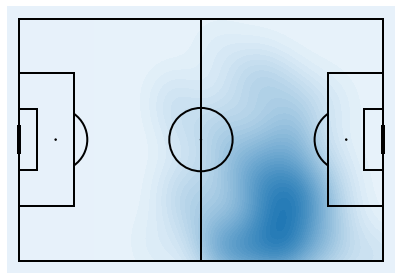

In [21]:
events = [
    event
    for event in dataset.events
    if event.player == player
]

player_events = to_pandas(events)

pitch = Pitch(pitch_color='#e7f1fa', line_zorder=1, line_color='black', pitch_type="statsbomb")
fig, ax = pitch.draw()
plot = pitch.kdeplot(
    player_events["coordinates_x"],
    player_events["coordinates_y"],
    ax=ax,
    shade=True,
    n_levels=50,
)